In [1]:
lines = readlines("input")

420-element Vector{String}:
 "on x=-44..7,y=-48..-4,z=-28..22"
 "on x=-14..37,y=-31..23,z=-46..0"
 "on x=-2..42,y=-40..5,z=-15..34"
 "on x=-6..40,y=-46..8,z=-4..43"
 "on x=-14..40,y=-22..28,z=-39..15"
 "on x=-26..18,y=-36..18,z=-22..24"
 "on x=-1..46,y=-14..39,z=-6..47"
 "on x=-9..43,y=-19..35,z=3..49"
 "on x=-2..49,y=-19..35,z=-44..9"
 "on x=-14..31,y=-31..23,z=-15..37"
 "off x=-15..0,y=10..20,z=-1..11"
 "on x=-13..39,y=-7..40,z=-16..29"
 "off x=-36..-23,y=-22..-7,z=22..32"
 ⋮
 "on x=2754..21460,y=-38868..-392,z=-93705..-64934"
 "on x=18042..31269,y=-47061..-19873,z=52410..82608"
 "on x=29379..68201,y=-51515..-41233,z=-45509..-34262"
 "off x=52671..84684,y=-16898..5471,z=37071..45630"
 "on x=-98677..-68218,y=-20295..4826,z=5421..30729"
 "off x=-49508..-22500,y=-2847..20414,z=-69003..-50843"
 "on x=-95062..-74272,y=9248..21864,z=-22635..1951"
 "on x=7542..29789,y=-48009..-23225,z=-85578..-64378"
 "off x=-45405..-37229,y=-83374..-62547,z=-17446..8556"
 "off x=-45880..-27014,y=72506..923

In [2]:
parse_line(x) = split(replace(replace(x, "on"=>1), "off"=>0), r" x=|\.\.|,[yz]=") .|> z->parse(Int,z)

parse_line (generic function with 1 method)

In [3]:
cubes = parse_line.(lines)

420-element Vector{Vector{Int64}}:
 [1, -44, 7, -48, -4, -28, 22]
 [1, -14, 37, -31, 23, -46, 0]
 [1, -2, 42, -40, 5, -15, 34]
 [1, -6, 40, -46, 8, -4, 43]
 [1, -14, 40, -22, 28, -39, 15]
 [1, -26, 18, -36, 18, -22, 24]
 [1, -1, 46, -14, 39, -6, 47]
 [1, -9, 43, -19, 35, 3, 49]
 [1, -2, 49, -19, 35, -44, 9]
 [1, -14, 31, -31, 23, -15, 37]
 [0, -15, 0, 10, 20, -1, 11]
 [1, -13, 39, -7, 40, -16, 29]
 [0, -36, -23, -22, -7, 22, 32]
 ⋮
 [1, 2754, 21460, -38868, -392, -93705, -64934]
 [1, 18042, 31269, -47061, -19873, 52410, 82608]
 [1, 29379, 68201, -51515, -41233, -45509, -34262]
 [0, 52671, 84684, -16898, 5471, 37071, 45630]
 [1, -98677, -68218, -20295, 4826, 5421, 30729]
 [0, -49508, -22500, -2847, 20414, -69003, -50843]
 [1, -95062, -74272, 9248, 21864, -22635, 1951]
 [1, 7542, 29789, -48009, -23225, -85578, -64378]
 [0, -45405, -37229, -83374, -62547, -17446, 8556]
 [0, -45880, -27014, 72506, 92343, -5157, 1778]
 [1, -30115, -2925, 52679, 71889, -68644, -48667]
 [1, -76029, -52766, -5

In [4]:
all_in_range(x) = ((x[2:end] .|> abs) .<= 50) |> all

all_in_range (generic function with 1 method)

In [25]:
all_in_range(cubes[1])

true

In [26]:
all_in_range(cubes[120])

false

In [28]:
small_cubes = filter(all_in_range, cubes)

20-element Vector{Vector{Int64}}:
 [1, -44, 7, -48, -4, -28, 22]
 [1, -14, 37, -31, 23, -46, 0]
 [1, -2, 42, -40, 5, -15, 34]
 [1, -6, 40, -46, 8, -4, 43]
 [1, -14, 40, -22, 28, -39, 15]
 [1, -26, 18, -36, 18, -22, 24]
 [1, -1, 46, -14, 39, -6, 47]
 [1, -9, 43, -19, 35, 3, 49]
 [1, -2, 49, -19, 35, -44, 9]
 [1, -14, 31, -31, 23, -15, 37]
 [0, -15, 0, 10, 20, -1, 11]
 [1, -13, 39, -7, 40, -16, 29]
 [0, -36, -23, -22, -7, 22, 32]
 [1, -42, 8, -27, 23, -24, 22]
 [0, 30, 44, -6, 11, -25, -12]
 [1, -14, 37, -20, 31, -27, 19]
 [0, -11, 7, 24, 39, -49, -36]
 [1, -40, 7, -46, 2, -8, 36]
 [0, -28, -9, 9, 19, -3, 13]
 [1, -32, 19, -46, 4, -10, 35]

In [31]:
boot_cube = zeros(Int, 101, 101, 101);
for cube in small_cubes
    turn = cube[1]
    coords = cube[2:end]
    coords .+= 51
    boot_cube[coords[1]:coords[2],coords[3]:coords[4],coords[5]:coords[6]] .= turn
end

In [32]:
sum(boot_cube)

567496

## Part II

In [5]:
mini = minimum(minimum.(cubes))

-98763

In [6]:
maxi = maximum(maximum.(cubes))

99438

In [7]:
n = (maxi - mini) + 1

198202

In [8]:
#using SparseArrays # unly supports 1D and 2D types
using SparseArrayKit

In [8]:
# spzeros(Int,n,n,n)

In [9]:
large_cube = SparseArray{Int8}(undef,(3,3,3))
large_cube[2:3, 1:2, 1:3] .= 1
large_cube[2:3, 2:3, 1:2] .= 0
sum(large_cube)

8

This is still much too memory intensive 😥
```julia
large_cube = SparseArray{Int8}(undef,(n,n,n))
for cube in cubes
    println(cube)
    turn = cube[1]
    coords = cube[2:end]
    coords .+= abs(mini) + 1
    large_cube[coords[1]:coords[2],coords[3]:coords[4],coords[5]:coords[6]] .= turn
end
sum(large_cube)
```

New idea: keep track of lit cuboids. When other cuboids overlap, split them into non-overlapping ones.

In [11]:
intersect(1:4, 3:9) |> length

2

In [12]:
have_overlap(q1, q2) = (length(intersect(q1[1]:q1[2], q2[1]:q2[2])) * length(intersect(q1[3]:q1[4], q2[3]:q2[4])) * length(intersect(q1[5]:q1[6], q2[5]:q2[6]))) > 0

have_overlap (generic function with 1 method)

In [20]:
using Plots

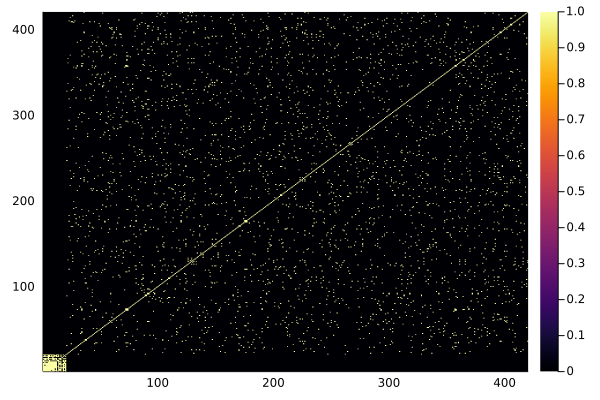

In [21]:
[have_overlap(c1[2:end], c2[2:end]) for c1 in cubes, c2 in cubes] |> heatmap

In [26]:
a = (1,2,3,4,5,6)
(9,9,a[3:end]...)

(9, 9, 3, 4, 5, 6)

In [29]:
# split c into smaller cuboids such that none of them overlap with d (and all of c not covered by d is covered by new cuboids)
function split_cuboid(c, d)
    if !have_overlap(c, d)
        return [c]
    end
    pieces = []
    r = c # remaining
    if d[1] ∈ c[1]+1:c[2] # slice left
        new_piece = (c[1],d[1]-1,c[3:end]...)
        push!(pieces, new_piece)
        r = (d[1],c[2],c[3:end]...)
    end
    if d[2] ∈ r[1]:r[2]-1 # slice right
        new_piece = (d[2]+1,r[2],r[3:end]...)
        push!(pieces, new_piece)
        r = (r[1],d[2],r[3:end]...)
    end
    if d[3] ∈ r[3]+1:r[4] # slice top
        new_piece = (r[1:3]...,d[3]-1,r[5:end]...)
        push!(pieces, new_piece)
        r = (r[1],r[2],d[3],r[4:end]...)
    end
    if d[4] ∈ r[3]:r[4]-1 # slice bottom
        new_piece = (r[1:2]...,d[4]+1,r[4],r[5:end]...)
        push!(pieces, new_piece)
        r = (r[1:3]...,d[4],r[5:end]...)
    end
    if d[5] ∈ r[5]+1:r[6] # slice front
        new_piece = (r[1:5]...,d[5]-1)
        push!(pieces, new_piece)
        r = (r[1:4]...,d[5],r[6])
    end
    if d[6] ∈ r[5]:r[6]-1 # slice back
        new_piece = (r[1:4]...,d[6]+1,r[6])
        push!(pieces, new_piece)
        # r = (r[1:3]...,d[4],r[5:end]...)
    end
    return pieces
end

split_cuboid (generic function with 1 method)

In [34]:
split_cuboid((0,5,0,5,0,5), (0,3,0,3,0,3))

3-element Vector{Any}:
 (4, 5, 0, 5, 0, 5)
 (0, 3, 4, 5, 0, 5)
 (0, 3, 0, 3, 4, 5)

In [46]:
lit_cuboids = []
for cube in cubes
    still_lit = []
    c = cube[2:end]
    for lc in lit_cuboids
        push!(still_lit, split_cuboid(lc, c)...)
    end
    if cube[1] == 1
        push!(still_lit, (c[1],c[2:end]...))
    end
    lit_cuboids = still_lit
end

In [47]:
lit_cuboids

3948-element Vector{Any}:
 (-44, -43, -48, -4, -28, 22)
 (-42, -41, -48, -28, -28, 22)
 (-40, -37, -48, -47, -28, 22)
 (-40, -37, -46, -28, -28, -9)
 (-42, -37, -27, -4, -28, -25)
 (-36, -27, -48, -47, -28, 22)
 (-36, -33, -46, -28, -28, -9)
 (-32, -27, -46, -28, -28, -11)
 (-36, -27, -27, -23, -28, -25)
 (-36, -27, -6, -4, -28, -25)
 (-36, -27, -22, -7, -28, -25)
 (-26, -15, -48, -47, -28, 22)
 (-26, -15, -46, -37, -28, -11)
 ⋮
 (58750, 91053, 10035, 24848, -42659, -12650)
 (-94933, -68735, -17490, 292, -1579, 5420)
 (2754, 7541, -38868, -392, -93705, -64934)
 (7542, 21460, -23224, -392, -93705, -64934)
 (7542, 21460, -38868, -23225, -93705, -85579)
 (18042, 31269, -47061, -19873, 52410, 82608)
 (29379, 68201, -51515, -41233, -45509, -34262)
 (-98677, -68218, -20295, 4826, 5421, 30729)
 (-95062, -74272, 9248, 21864, -22635, 1951)
 (7542, 29789, -48009, -23225, -85578, -64378)
 (-30115, -2925, 52679, 71889, -68644, -48667)
 (-76029, -52766, -54478, -30765, -46175, -28566)

In [48]:
cuboid_size(c) = (c[2]-c[1]+1)*(c[4]-c[3]+1)*(c[6]-c[5]+1)

cuboid_size (generic function with 1 method)

In [49]:
cuboid_size((1,5,1,5,1,5))

125

In [51]:
cuboid_size.(lit_cuboids) |> sum

1355961721298916